# Part A

In [605]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [606]:
data_n = pd.read_csv('Normal.csv')
data_h = pd.read_csv('Type_H.csv')
data_s = pd.read_csv('Type_S.csv')

In [607]:
data_n.shape

(100, 7)

In [608]:
data_n

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [609]:
data_h.shape

(60, 7)

In [610]:
data_h

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Type_H
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Type_H
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Type_H
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Type_H
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Type_H


In [611]:
data_s.shape

(150, 7)

In [612]:
data_s

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


The three dataframes have got same names for each column. In other words, the column name for a given index is the same across all the three dataframes. 

In [613]:
data_n.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [614]:
data_h.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [615]:
data_s.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [616]:
data_n['Class'].describe()

count        100
unique         2
top       Normal
freq          73
Name: Class, dtype: object

In [617]:
data_n['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [618]:
data_h['Class'].describe()

count         60
unique         2
top       Type_H
freq          37
Name: Class, dtype: object

In [619]:
data_h['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [620]:
data_s['Class'].describe()

count        150
unique         2
top       Type_S
freq         133
Name: Class, dtype: object

In [621]:
data_s['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

In [622]:
data_n.iloc[:,6]='normal'
data_n['Class'].describe()

count        100
unique         1
top       normal
freq         100
Name: Class, dtype: object

In [623]:
data_h.iloc[:,6]='type_h'
data_h['Class'].describe()

count         60
unique         1
top       type_h
freq          60
Name: Class, dtype: object

In [624]:
data_s.iloc[:,6]='type_s'
data_s['Class'].describe()

count        150
unique         1
top       type_s
freq         150
Name: Class, dtype: object

In [625]:
my_data = pd.concat([data_n,data_h,data_s],axis=0)

In [626]:
print(my_data.sample(n=5))

     P_incidence     P_tilt     L_angle    S_slope    P_radius    S_Degree  \
74     52.204693  17.212673   78.094969  34.992020  136.972517   54.939134   
4      49.712859   9.652075   28.317406  40.060784  108.168725    7.918501   
81     51.079833  14.209935   35.951229  36.869898  115.803711    6.905090   
137    58.828379  37.577873  125.742385  21.250506  135.629418  117.314683   
0      38.505273  16.964297   35.112814  21.540976  127.632875    7.986683   

      Class  
74   type_s  
4    type_h  
81   normal  
137  type_s  
0    normal  


In [627]:
my_data.reset_index(inplace=True,drop=True)
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [628]:
a=(my_data['P_incidence'].isnull().sum()/310)*100
print(f"The percentage of null values in P_incidence column is {a}%")

The percentage of null values in P_incidence column is 0.0%


In [629]:
b=(my_data['P_tilt'].isnull().sum()/310)*100
print(f"The percentage of null values in P_tilt column is {b}%")

The percentage of null values in P_tilt column is 0.0%


In [630]:
c=(my_data['L_angle'].isnull().sum()/310)*100
print(f"The percentage of null values in L_angle column is {c}%")

The percentage of null values in L_angle column is 0.0%


In [631]:
d=(my_data['S_slope'].isnull().sum()/310)*100
print(f"The percentage of null values in S_slope column is {d}%")

The percentage of null values in S_slope column is 0.0%


In [632]:
e=(my_data['P_radius'].isnull().sum()/310)*100
print(f"The percentage of null values in P_radius column is {e}%")

The percentage of null values in P_radius column is 0.0%


In [633]:
f=(my_data['S_Degree'].isnull().sum()/310)*100
print(f"The percentage of null values in S_Degree column is {f}%")

The percentage of null values in S_Degree column is 0.0%


In [634]:
my_data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


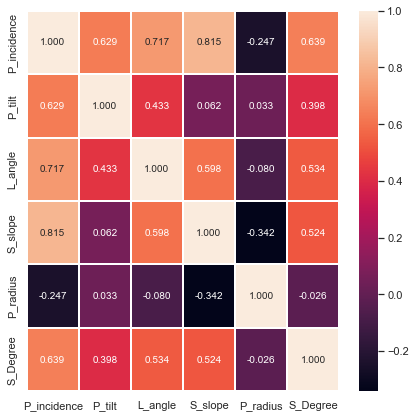

In [635]:
fig,ax = plt.subplots(figsize=(7, 7)) 
sns.heatmap(my_data.corr(), ax=ax, annot=True, linewidths=0.02, fmt= '.3f');

Incidence is strongly correlated with tilt, angle, slope and degree with a correlation coefficient of 0.629, 0.717, 0.815 and 0.639 respectively. It is weakly correlated with radius with a correlation coefficient of -0.247.

Tilt is moderately correlated with angle and degree with a correlation coefficient of 0.433 and 0.398 respectively. It is very weakly correlated with slope and radius with correlation coefficient values of 0.062 and 0.033 respectively.

Angle is moderately correlated with slope and degree with correlation coefficient values of 0.598 and 0.534 respectively. It is very weakly correlated with radius with a correlation coefficient of -0.080.

Slope is weakly correlated with radius and moderately correlated with degree with coefficient of correlation values of -0.342 and 0.524 respectively.

Radius is very weakly correlated with degree with a correlation coefficient of -0.026.

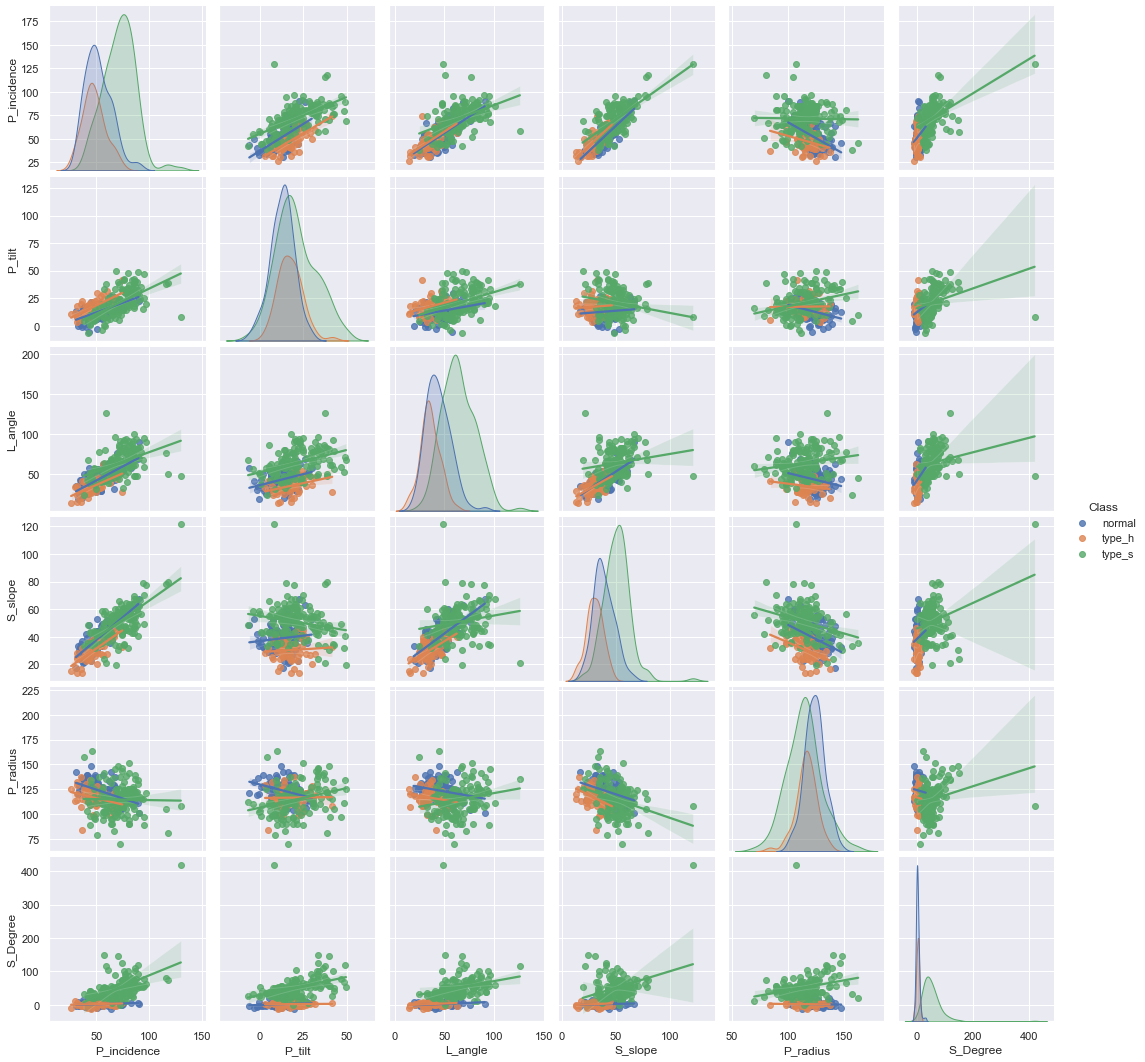

In [636]:
sns.pairplot(my_data, hue = 'Class', kind='reg');

It is observed that there is a difference in correlation between any two variables among the three classes. In other words, each class can be distinguished from the other based on the differences in correlation between the variables. However, it is also observed that these differences are too small in some cases.  

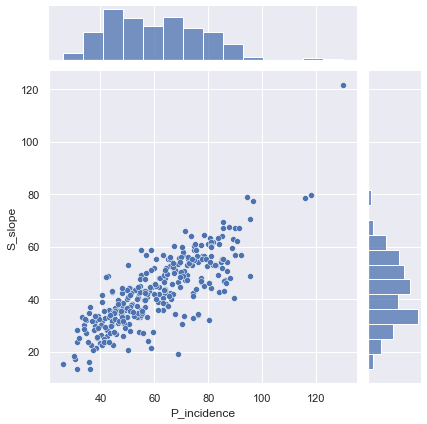

In [637]:
sns.jointplot(x=my_data['P_incidence'], y=my_data['S_slope']);

Incidence and slope are the most strongly correlated features in the dataset. They both show almost similar individual distribution. 

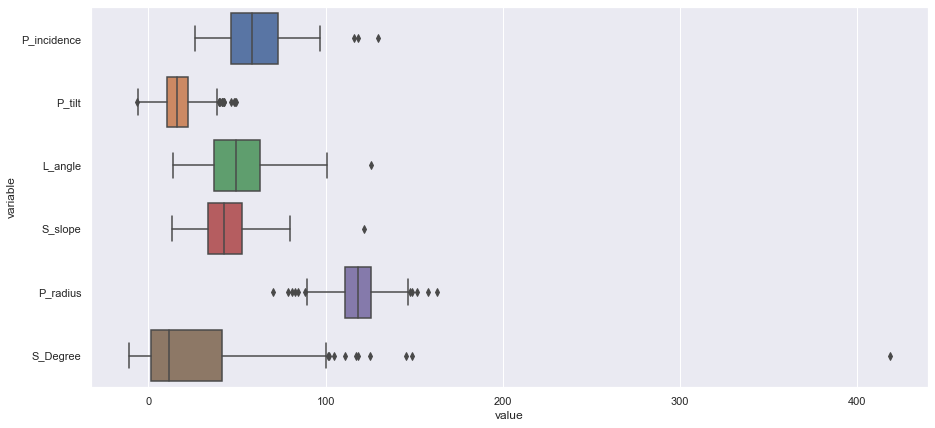

In [638]:
df=my_data.drop(labels=['Class'],axis=1)
melted=pd.melt(df)
fig,ax = plt.subplots(figsize=(15, 7))
sns.boxplot(y='variable',x='value',data=melted);

Incidence, angle, slope and degree are having right skewed distribution. Angle and slope variables have only one outlier. Incidence has three outliers. Tilt, radius and degree have many outliers.

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
dtypes: float64(6)
memory usage: 14.7 KB


In [640]:
my_data['Class']=my_data.Class.astype('category')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


In [641]:
X=df
y=my_data['Class']

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
X_train.apply(zscore)
X_test.apply(zscore)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
275,-0.301810,-0.676404,-0.112887,0.070387,-1.275546,0.338133
309,-0.737006,0.056042,-0.985013,-0.913979,-1.581637,-0.060940
308,1.328898,0.443880,2.100855,1.301517,0.466613,0.802724
48,-1.151590,-0.555234,-0.897063,-1.019404,1.021859,-0.558661
282,0.687346,1.541520,1.874223,-0.160979,-0.642703,0.414240
...,...,...,...,...,...,...
291,1.265683,2.402465,0.346728,-0.019144,-1.383444,0.428277
66,-0.576345,-0.217659,-1.149821,-0.548480,1.280907,-0.534922
192,1.206955,-0.000202,0.911785,1.438548,0.739710,0.790050
60,-0.577062,-0.684824,0.124466,-0.252299,0.901014,-0.605121


In [643]:
KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance' )

In [644]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [645]:
predicted_labels = KNN.predict(X_test)
base_accuracy=KNN.score(X_test, y_test)

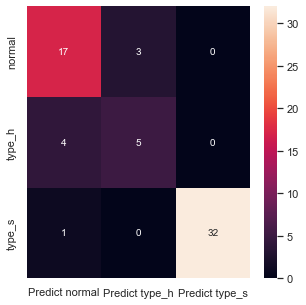

In [646]:
#Confusion matrix of base KNN model for test data
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["normal", "type_h", "type_s"])
df_cm = pd.DataFrame(cm, index = [i for i in ["normal","type_h","type_s"]], columns = [i for i in ["Predict normal","Predict type_h","Predict type_s"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True);

In [647]:
predicted_labels_train = KNN.predict(X_train)
KNN.score(X_train, y_train)

1.0

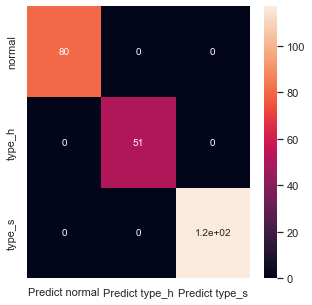

In [648]:
#Confusion matrix of train data
cm_train=metrics.confusion_matrix(y_train, predicted_labels_train, labels=["normal", "type_h", "type_s"])
df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["normal","type_h","type_s"]], columns = [i for i in ["Predict normal","Predict type_h","Predict type_s"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_train, annot=True);

In [528]:
#Classification report of test data
report_test=metrics.classification_report(y_test,predicted_labels,target_names=('normal','type_h','type_s'))
print(report_test)

              precision    recall  f1-score   support

      normal       0.77      0.85      0.81        20
      type_h       0.62      0.56      0.59         9
      type_s       1.00      0.97      0.98        33

    accuracy                           0.87        62
   macro avg       0.80      0.79      0.79        62
weighted avg       0.87      0.87      0.87        62



In [529]:
#Classification report of train data
report_train=metrics.classification_report(y_train,predicted_labels_train,target_names=('normal','type_h','type_s'))
print(report_train)

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        80
      type_h       1.00      1.00      1.00        51
      type_s       1.00      1.00      1.00       117

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [530]:
scores =[]
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))

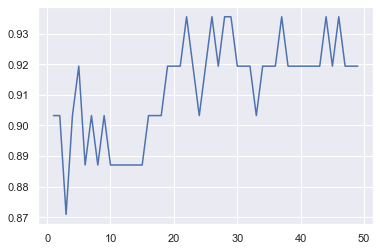

In [531]:
plt.plot(range(1,50),scores);

In [532]:
KNN_best = KNeighborsClassifier(n_neighbors = 21, weights = 'distance' )
KNN_best.fit(X_train, y_train)
predicted = KNN_best.predict(X_test)
improved_accuracy=KNN_best.score(X_test, y_test)

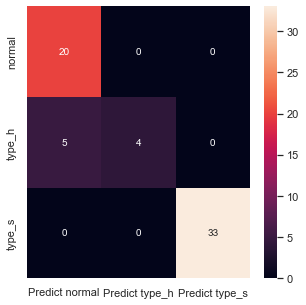

In [533]:
#Confusion matrix of improved KNN model
cm2=metrics.confusion_matrix(y_test, predicted, labels=["normal", "type_h", "type_s"])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ["normal","type_h","type_s"]], columns = [i for i in ["Predict normal","Predict type_h","Predict type_s"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm2, annot=True);

In [534]:
#Classification report of improved KNN model
report=metrics.classification_report(y_test,predicted,target_names=('normal','type_h','type_s'))
print(report)

              precision    recall  f1-score   support

      normal       0.80      1.00      0.89        20
      type_h       1.00      0.44      0.62         9
      type_s       1.00      1.00      1.00        33

    accuracy                           0.92        62
   macro avg       0.93      0.81      0.83        62
weighted avg       0.94      0.92      0.91        62



In [535]:
predicted_train = KNN_best.predict(X_train)
KNN_best.score(X_train, y_train)

1.0

In [536]:
report2=metrics.classification_report(y_train,predicted_train,target_names=('normal','type_h','type_s'))
print(report2)

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        80
      type_h       1.00      1.00      1.00        51
      type_s       1.00      1.00      1.00       117

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [537]:
change=(improved_accuracy-base_accuracy)*100
print(f'The change in accuracy after changing the number of neighbours value to 21 is {round(change,2)}%')

The change in accuracy after changing the number of neighbours value to 21 is 4.84%


The weighted average of precision, recall and F1score increased by 7%, 5% and 4% respectively after changing the number of neighbours value to 21.

The 'n_neighbors' parameter contributed the most to model improvement.

# Part B

In [649]:
df1=pd.read_csv('Data1.csv')
df2=pd.read_csv('Data2.csv')
print(df1.shape)
print(df2.shape)
print(df1.columns)
print(df2.columns)
print(df1.dtypes)
print(df2.dtypes)

(5000, 8)
(5000, 7)
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [650]:
B_data=pd.merge(df1,df2,how='left',on='ID')
B_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [651]:
B_data['CreditCard']=B_data['CreditCard'].astype('object')
B_data['InternetBanking']=B_data['InternetBanking'].astype('object')
B_data['FixedDepositAccount']=B_data['FixedDepositAccount'].astype('object')
B_data['Security']=B_data['Security'].astype('object')
B_data['Level']=B_data['Level'].astype('object')
B_data['HiddenScore']=B_data['HiddenScore'].astype('object')

In [652]:
B_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

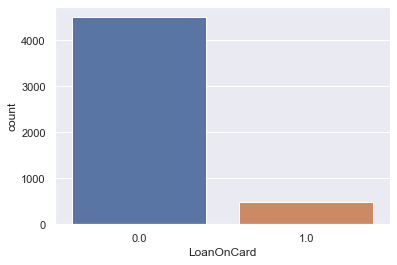

In [653]:
sns.countplot(x=B_data['LoanOnCard']);

The target variable is highly imbalanced with very few number of customers who had taken a loan. The number of customers who did not take a loan is approximately ten times higher than those who took a loan.

In [654]:
pd.DataFrame(B_data.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
ID,0
Age,0
CustomerSince,0
HighestSpend,0
ZipCode,0
HiddenScore,0
MonthlyAverageSpend,0
Level,0
Mortgage,0
Security,0


In [655]:
B_data.shape

(5000, 14)

In [656]:
B_data.dropna(inplace=True)

In [657]:
B_data.shape

(4980, 14)

In [658]:
B_data['HiddenScore'].value_counts()

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64

In [659]:
B_data['Level'].value_counts()

1    2089
3    1496
2    1395
Name: Level, dtype: int64

In [660]:
B_data['Security'].value_counts()

0    4460
1     520
Name: Security, dtype: int64

In [661]:
B_data['FixedDepositAccount'].value_counts()

0    4678
1     302
Name: FixedDepositAccount, dtype: int64

In [662]:
B_data['InternetBanking'].value_counts()

1    2974
0    2006
Name: InternetBanking, dtype: int64

In [663]:
B_data['CreditCard'].value_counts()

0    3514
1    1466
Name: CreditCard, dtype: int64

There were no unexpected values in the categorical features.

In [664]:
dfm=B_data.drop(labels=['LoanOnCard','ID','ZipCode'],axis=1)
dfm.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
dtype: object

In [665]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   HiddenScore          4980 non-null   object 
 4   MonthlyAverageSpend  4980 non-null   float64
 5   Level                4980 non-null   object 
 6   Mortgage             4980 non-null   int64  
 7   Security             4980 non-null   object 
 8   FixedDepositAccount  4980 non-null   object 
 9   InternetBanking      4980 non-null   object 
 10  CreditCard           4980 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 466.9+ KB


In [666]:
X2=dfm
y2=B_data['LoanOnCard']

In [667]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2, test_size=0.25, random_state=5)
std_scale=StandardScaler()
Xtrain.loc[:,0]=std_scale.fit_transform(Xtrain[['Age']])
Xtrain.loc[:,1]=std_scale.fit_transform(Xtrain[['CustomerSince']])
Xtrain.loc[:,2]=std_scale.fit_transform(Xtrain[['HighestSpend']])
Xtrain.loc[:,4]=std_scale.fit_transform(Xtrain[['MonthlyAverageSpend']])
Xtrain.loc[:,6]=std_scale.fit_transform(Xtrain[['Mortgage']])
Xtest.loc[:,0]=std_scale.fit_transform(Xtest[['Age']])
Xtest.loc[:,1]=std_scale.fit_transform(Xtest[['CustomerSince']])
Xtest.loc[:,2]=std_scale.fit_transform(Xtest[['HighestSpend']])
Xtest.loc[:,4]=std_scale.fit_transform(Xtest[['MonthlyAverageSpend']])
Xtest.loc[:,6]=std_scale.fit_transform(Xtest[['Mortgage']])

C:\Users\vjanu\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vjanu\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vjanu\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [668]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)
model_score = model.score(Xtest, ytest)
print(model_score)

0.9397590361445783


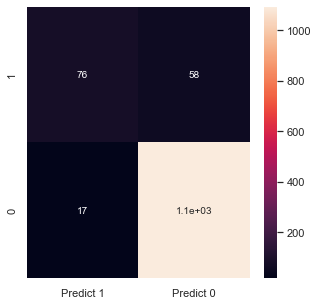

In [603]:
cn_m=metrics.confusion_matrix(ytest, y_predict, labels=[1, 0])

df_cn_m = pd.DataFrame(cn_m, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cn_m, annot=True);

In [604]:
class_report=metrics.classification_report(ytest,y_predict,target_names=('0','1'))
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1111
           1       0.82      0.57      0.67       134

    accuracy                           0.94      1245
   macro avg       0.88      0.78      0.82      1245
weighted avg       0.94      0.94      0.93      1245



False negatives are very high. The model is misclassifying 58 people who actually took loan as people who did not take loan. However, it is misclassifying only 17 people who actually did not take loan as people who took loan.

In [564]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Before oversampling: ",Counter(ytrain))
Oversampler = SMOTE()
X_train_new, y_train_new = Oversampler.fit_resample(Xtrain, ytrain)
print("After oversampling: ",Counter(y_train_new))

Before oversampling:  Counter({0.0: 3389, 1.0: 346})
After oversampling:  Counter({0.0: 3389, 1.0: 3389})


In [566]:
model.fit(X_train_new, y_train_new)
y_predict_new = model.predict(Xtest)
model_score_new = model.score(Xtest, ytest)
print(model_score_new)

0.9020080321285141


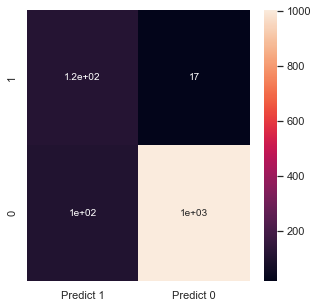

In [567]:
cn_m_new=metrics.confusion_matrix(ytest, y_predict_new, labels=[1, 0])

df_cn_m_new = pd.DataFrame(cn_m_new, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cn_m_new, annot=True);

In [568]:
class_report_new=metrics.classification_report(ytest,y_predict_new,target_names=('0','1'))
print(class_report_new)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1111
           1       0.53      0.87      0.66       134

    accuracy                           0.90      1245
   macro avg       0.76      0.89      0.80      1245
weighted avg       0.93      0.90      0.91      1245



The model performs almost the same with balanced data. The accuracy was reduced by 4%. However, recall for those who did not take loan decreased by 7% but increased by 30% for those who took loan. The precision increased by 3% for those who did not take loan but decreased by 28% for those who took loan.

In [590]:
from sklearn import svm
clf_svm = svm.SVC(gamma=0.01, C=5)
clf_svm.fit(X_train_new, y_train_new)
y_pred_svm = clf_svm.predict(Xtest)
clf_score_svm = clf_svm.score(Xtest, ytest)
print(clf_score_svm)

class_report_svm=metrics.classification_report(ytest,y_pred_svm,target_names=('0','1'))
print(class_report_svm)

0.9606425702811245
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1111
           1       0.76      0.92      0.83       134

    accuracy                           0.96      1245
   macro avg       0.88      0.94      0.91      1245
weighted avg       0.97      0.96      0.96      1245



In [586]:
clf_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance' )
clf_knn.fit(X_train_new, y_train_new)
y_pred_knn = clf_knn.predict(Xtest)
clf_score_knn = clf_knn.score(Xtest, ytest)
print(clf_score_knn)

0.9622489959839358


In [579]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,2,3,4,5,6,7,8,9], 
'gamma': [0.025, 0.05, 0.01, 0.075, 0.10],
'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = False, verbose = 0)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)

{'C': 8, 'gamma': 0.1, 'kernel': 'rbf'}


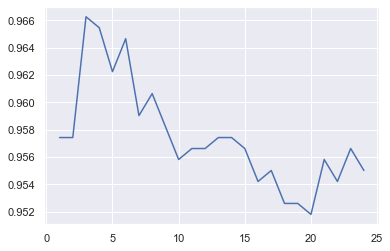

In [574]:
scores_knn =[]
for k in range(1,25):
    classifier_knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    classifier_knn.fit(X_train_new, y_train_new)
    scores_knn.append(classifier_knn.score(Xtest, ytest))
plt.plot(range(1,25),scores_knn);

The Support Vector Machine model is performing better than the K-nearest neighbour model with an accuracy of 97.51% after experimenting with various hyperparameters.

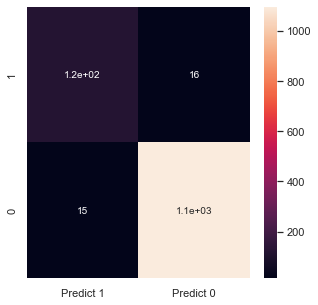

In [588]:
clf_svm2 = svm.SVC(gamma=0.1, C=8)
clf_svm2.fit(X_train_new, y_train_new)
y_pred_svm2 = clf_svm2.predict(Xtest)
clf_score_svm2 = clf_svm2.score(Xtest, ytest)

cn_m_final=metrics.confusion_matrix(ytest, y_pred_svm2, labels=[1, 0])

df_cn_m_final = pd.DataFrame(cn_m_final, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,5))
sns.heatmap(df_cn_m_final, annot=True);

In [589]:
class_report_final=metrics.classification_report(ytest,y_pred_svm2,target_names=('0','1'))
print(class_report_final)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1111
           1       0.89      0.88      0.88       134

    accuracy                           0.98      1245
   macro avg       0.94      0.93      0.93      1245
weighted avg       0.98      0.98      0.98      1245



The accuracy of the final model is 2% higher than the base model. The recall for the people who did not take loan was increased by 2%. The precision for those who took loan increased by 13%. However, the recall for those who took loan decreased by 4%.